# Text mining on text datasets

<a href="https://colab.research.google.com/drive/1OkSkKo8Pqt7yKOyRCSY-d8RhwG4ZS6ys" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
</a>

Return to the [castle](https://github.com/Nkluge-correa/TeenyTinyCastle).

Text mining, also known as text data mining or text analytics, is the process of extracting useful information and insights from unstructured text data. It involves a combination of techniques from natural language processing, machine learning, and data mining to extract patterns, trends, and other valuable insights from large volumes of text data. Given that large volumes of text feed the development of modern language models, exploring these datasets might be an avenue to promote a better understanding of, for example, "**why model X acts the way it does.**" In short, understanding the characteristics of the data used to train our model can give us some insight into the future behavior of the models trained on that data.

![image](https://miro.medium.com/v2/resize:fit:828/format:webp/1*a3xerDP7jqQglKxfIxfxVw.jpeg)

[Source](https://towardsdatascience.com/text-mining-for-dummies-text-classification-with-python-98e47c3a9deb).

In this notebook, we will be analyzing a dataset created for toxicity detection: [Toxic-Text](https://huggingface.co/datasets/nicholasKluge/toxic-text), available on the Hub. 🤗

> **Note: For more information on the subject, we recommend [Text Mining: The state of the art and the challenges](https://www.hindawi.com/journals/mpe/2022/5782587/).**


**⚠️ WARNING: THIS DATASET CONTAINS SAMPLES OF TOXIC, OFFENSIVE, AND GENERALLY DISTURBING LANGUAGE ⚠️**

In [1]:
!pip install datasets -q

from datasets import load_dataset

dataset = load_dataset("nicholasKluge/toxic-text", split='portuguese')

display(dataset.to_pandas())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating portuguese split:   0%|          | 0/28103 [00:00<?, ? examples/s]

Generating english split:   0%|          | 0/41843 [00:00<?, ? examples/s]

,non_toxic,toxic
0,"na maioria dos países, é legal ser gay.. atual...",esteja ciente de que a comunidade trans é resp...
1,a terceira preocupação é que as crianças em fa...,não é certo que um pai deixe seu filho fazer a...
2,as atitudes em relação ao casamento entre pess...,é um facto que as pessoas trans são desviantes...
3,sentimos que o termo lésbica não descrevia com...,casais de lésbicas que têm filhos ainda não sã...
4,durante toda a minha vida sempre tive uma fort...,deixe-me apenas dizer que algo precisa ser fei...
...,...,...
28098,kkkkkkkkk eu que tenho que rir disso,bom dia pra quem dormi pra caralho pq tava vir...
28099,tá chovendo pra caralho mais geral tá aqui em ...,Idiota Não seria melhor um prefeito honesto e ...
28100,e eu que tenho 20 mas tenho cara de ser mais n...,ainda bem q essa porra cresce
28101,ta mana menos vai ta mei feio ja,minha tia falando uma putaria do caralho kkkkk...


The first tool we will be using in this tutorial is [`Scattertext`](https://github.com/JasonKessler/scattertext), a Python package that lets you interactively visualize how two categories of text differ. In short, this tool presents a scatterplot, where each axis corresponds to the rank frequency a term occurs in a category of documents. The tool can display thousands of visible term-representing points through a tie-breaking strategy and find space to legibly label hundreds of them.

> **Note: To learn more on the development of it, read "[Scattertext: a Browser-Based Tool for Visualizing how Corpora Differ](https://arxiv.org/abs/1703.00565)".**

For the purpose of this tutorial, we will only be using 1000 samples from each column of our dataset (**"non_toxic"** and **"toxic"**).

In [16]:
import pandas as pd

# Convert dataset to pandas.dataframe
df = dataset.to_pandas()

# Select 1000 samples from each gorup
a = df['toxic'][:1000].tolist()
b = df['non_toxic'][:1000].tolist()

# Concatenate both into a DataFrame
dff = pd.DataFrame({"text": a + b, "toxicity": ["toxic"] * 1000 + ["non toxic"] * 1000})

display(dff)

,text,toxicity
0,esteja ciente de que a comunidade trans é resp...,toxic
1,não é certo que um pai deixe seu filho fazer a...,toxic
2,é um facto que as pessoas trans são desviantes...,toxic
3,casais de lésbicas que têm filhos ainda não sã...,toxic
4,deixe-me apenas dizer que algo precisa ser fei...,toxic
...,...,...
1995,há um debate sobre a adoção legal por pessoas ...,non toxic
1996,"pelo contrário, estudos que compararam parceir...",non toxic
1997,muitas lésbicas ainda se autodenominam lésbica...,non toxic
1998,não há nada de errado em ser uma mulher hetero...,non toxic


Now, we will be using a custom list of stopwords to exclude words like **"um"**, **"like"**, and **"you know"**, which are filler words that carry little information. Our stopwords, for both [English](https://huggingface.co/datasets/AiresPucrs/stopwords-en) and [Portuguese](https://huggingface.co/datasets/AiresPucrs/stopwords-pt), are available in the Hub. 🤗

We also need to download the [`en_core_web_sm`](https://spacy.io/models/en/#en_core_web_sm) if we are working with English text or the [`pt_core_news_sm`](https://spacy.io/models/pt#pt_core_news_sm) if you are working with Portuguese text. These are text pipelines optimized for CPU, with pre-built functionalities like taggers and parsers.

In [ ]:
#!python -m spacy download en_core_web_sm
#!python -m spacy download pt_core_news_sm -q
#!pip install scattertext -q

import spacy
import scattertext
from IPython.display import IFrame

# Load the selected language pipeline
nlp = spacy.load('pt_core_news_sm')

# Download the stopwords
stopwords = load_dataset('AiresPucrs/stopwords-pt', split='train')['stopwords']

# Build a corpus
corpus = (scattertext.CorpusFromPandas(dff,
                                        category_col='toxicity',
                                        text_col='text',
                                        nlp=nlp)
            .build()
            .remove_terms(stopwords, ignore_absences=True)
            )

# Create the scatter plot
html = scattertext.produce_scattertext_explorer(
                   corpus,
                   category='toxic',
                   category_name='toxic',
                   not_category_name='non Toxic',
                   width_in_pixels=700)

# Save it as an HTML file
open("Scattertext-plot.html", 'wb').write(html.encode('utf-8'))

# Display the HTML file using an iframe (Colab won't display local file images in html)
IFrame(src="Scattertext-plot.html", width='100%', height=600)

Scattertext results in a minimalist HTML dashboard, allowing you to perform searches on terms and their frequencies. This can be useful when we are exploring a new dataset to be used.

Another method to explore and examine the frequency distributions of text datasets is through univariate visualization, where a single variable is plotted or displayed in univariate visualization to comprehend its frequency, distribution, and other properties. Univariate visualization methods for text mainly include **word clouds** and **frequency histograms**, which reveal the frequency of particular words or phrases in a dataset. Univariate visualization in text mining can be used to find significant terms, patterns, and topics within a dataset. It is frequently applied as an initial step in text analysis to help understand the data.

Let us start with word clouds, using the [`wordcloud`](https://pypi.org/project/wordcloud/) and [`matplotlib`](https://matplotlib.org/) packages.

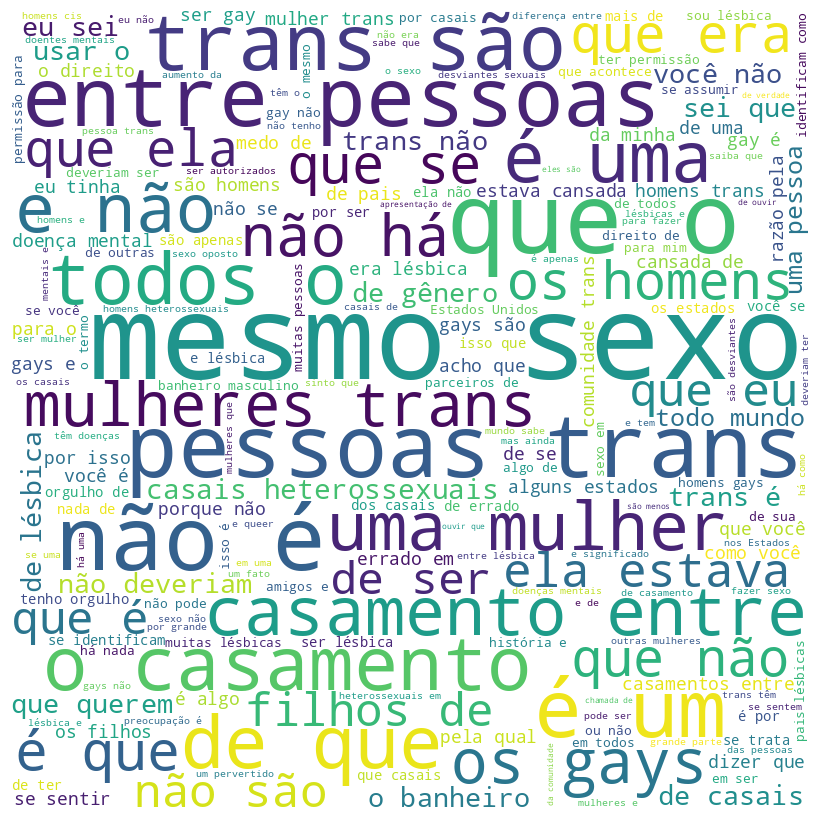

In [22]:
!pip install WordCloud -q

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create one huge string with all the text data we have
text = ' '.join(list(dff.text))

# Pass this string into the `WordCloud`
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the results
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

As you can see, this dataset has a lot of gender attributes, as it should, given that gender slurs are one of the things we would like toxicity detection models to be able to deal with. Now, for **frequency histograms**, we can use our good old friend [`plotly`](https://plotly.com/python/).

And, to get frequency terms on text, we can use [`sklearn.feature_extraction.text.CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). This sklearn feature allows us to create frequency histograms for the terms in our text data. These recurrent words or combinations of words are what we call n-grams. An n-gram chart is a graphical representation of the frequency of n-grams in a given text corpus. In other words, it is a sequence of n items from a given sample of text or speech, where the items are words in groups of n size. In an n-gram chart, the x-axis represents the n-grams, and the y-axis represents their frequency in the corpus. Let's implement this in the cell below.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

def get_top_n_words(corpus, top_k, n):
    """
    Function to get the top k most frequent words in the given corpus.

    Parameters:
        corpus (list): List of text documents.
        top_k (int): Number of top words to return.
        n (int): n-gram range. Specifies the range of n-grams to consider (e.g., 1 for unigrams, 2 for bigrams, etc.).

    Returns:
        list: List of tuples containing the top k words and their frequencies.
    """
    # Initialize CountVectorizer with specified n-gram range and stop words
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stopwords).fit(corpus)

    # Transform the corpus into a bag-of-words representation
    bag_of_words = vec.transform(corpus)

    # Calculate the sum of word occurrences in the entire corpus
    sum_words = bag_of_words.sum(axis=0)

    # Create a list of tuples containing words and their frequencies
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # Sort the list of tuples by frequency in descending order
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Return the top k words and their frequencies
    return words_freq[:top_k]


Now we can search for frequencies in unigrams:

In [28]:
common_words = get_top_n_words(dff.text, 20, 1)
word, freq = zip(*common_words)

fig = px.bar(x=word, y=freq,
            title='Top-20 words (unigrams) in Toxic Text')

fig.update_layout(template= 'ggplot2',
                    xaxis_title="<b>Unigrams</b>",
                    yaxis_title="<b>Word Count</b>",)

fig.show()

For bigrams:

In [32]:
common_words = get_top_n_words(dff.text, 20, 2)
word, freq = zip(*common_words)

fig = px.bar(x=word, y=freq,
            title='Top-20 words (bigrams) in Toxic Text')

fig.update_layout(template= 'ggplot2',
                    xaxis_title="<b>Bigrams</b>",
                    yaxis_title="<b>Word Count</b>",)

fig.show()

And trigrams (feel free to grow the $n$ as you wish):

In [31]:
common_words = get_top_n_words(dff.text, 20, 3)
word, freq = zip(*common_words)

fig = px.bar(x=word, y=freq,
            title='Top-20 words (trigrams) in Toxic Text')

fig.update_layout(template= 'ggplot2',
                    xaxis_title="<b>Trigrams</b>",
                    yaxis_title="<b>Word Count</b>",)

fig.show()

Even though this dataset is split 50/50 between toxic and nontoxic, the n-gram analysis reveals that the highest occurrence of words in this corpus involves people's conversations about gender biases and stereotypes, and perhaps this indicates that this is an excellent dataset to be used against this specific kind of discrimination.

> **Note: When working with large-scale datasets, one can also use automated tagging pipelines like the [toolkit used to create the Dolma Dataset](https://github.com/allenai/dolma). These can provide you with several tools, like taggers, that can help you filter and better grasp the nature of the text data you are working on.**

---

Return to the [castle](https://github.com/Nkluge-correa/TeenyTinyCastle).